In [1]:
import rf
import numpy as np
from sklearn.metrics.pairwise import rbf_kernel, laplacian_kernel
from matplotlib import pyplot as plt

# Random Fourier Features

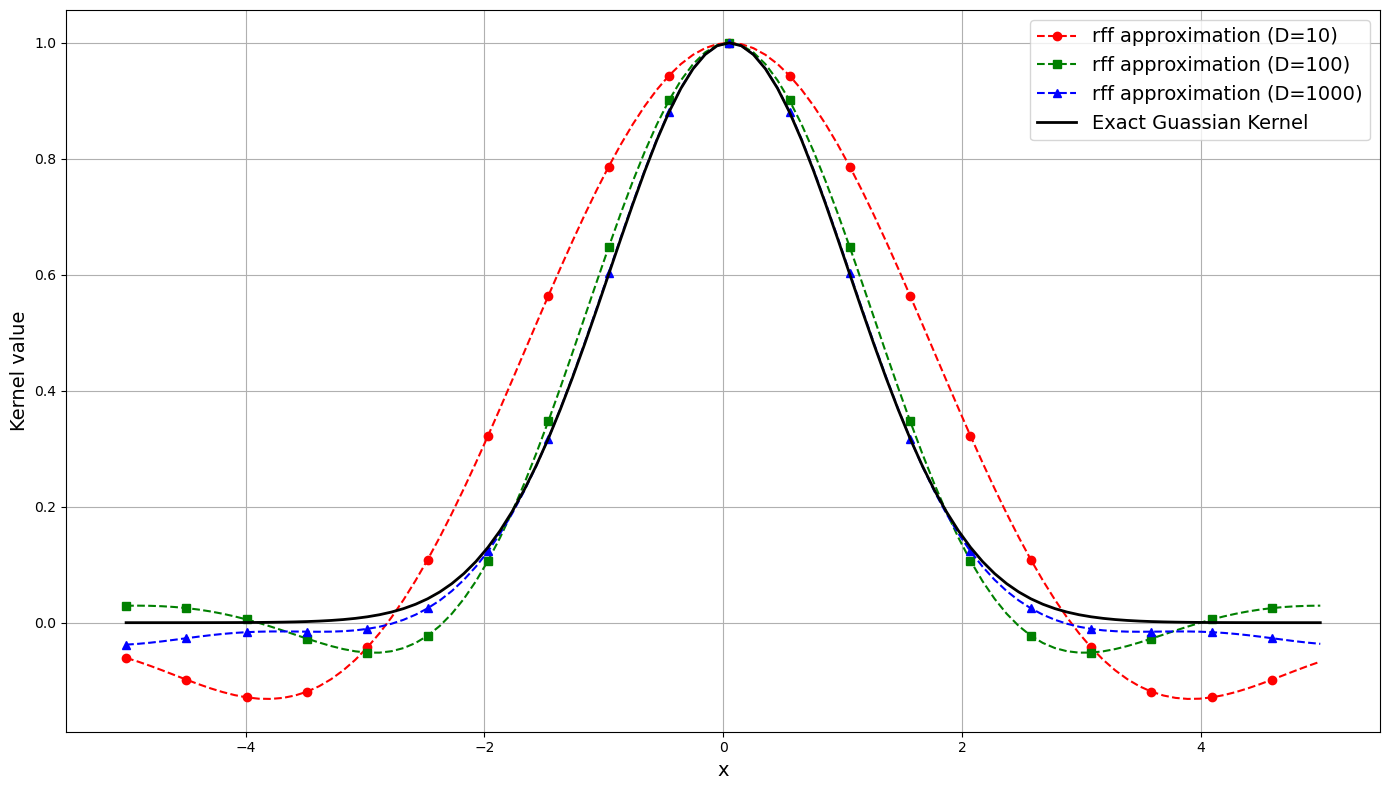

In [2]:
x = np.linspace(-5, 5, 100).reshape(-1, 1)
# Gaussian kernel with \sigma = 1
gaussian_kernel_exact = rbf_kernel(x, None, 1/2)
# We observe the kernel value of the 50th data point with respect to all other data points, including itself.
ref = 50

plt.figure(figsize=(14, 8))
colors = ['red', 'green', 'blue']
markers = ['o', 's', '^']
for i, D in enumerate([10, 100, 1000]):
    Z = rf.rff_1(x, D)
    gaussian_kernel_approximate = Z @ Z.T
    plt.plot(x, gaussian_kernel_approximate[ref, :], label=f'rff approximation (D={D})', color=colors[i], linestyle='--', marker=markers[i], markevery=5)
    
plt.plot(x, gaussian_kernel_exact[ref, :], label='Exact Guassian Kernel', color='black', linewidth=2)

plt.xlabel('x', fontsize=14)
plt.ylabel('Kernel value', fontsize=14)
plt.legend(loc='best', fontsize=14)
plt.grid(True)
plt.tight_layout()
plt.show()

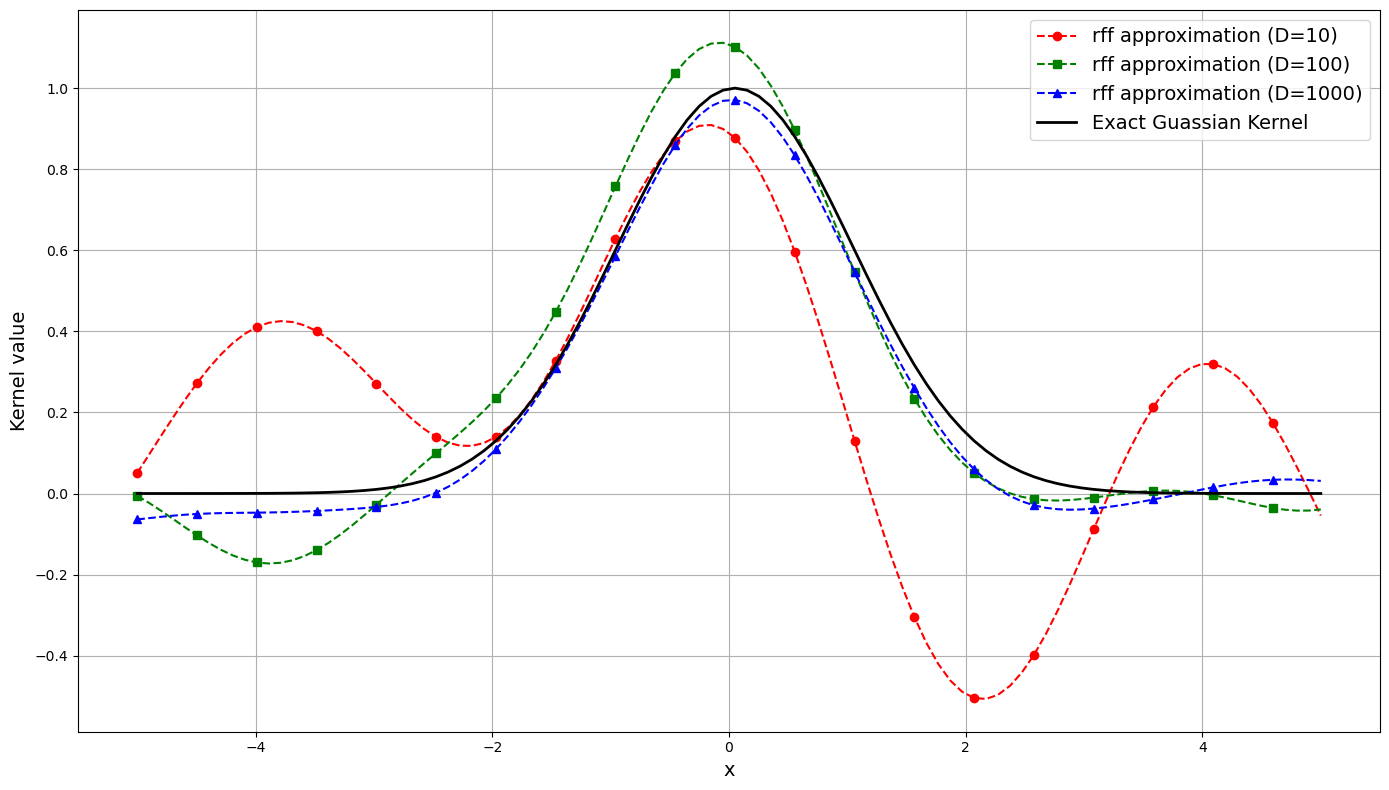

In [3]:
x = np.linspace(-5, 5, 100).reshape(-1, 1)
# Gaussian kernel with \sigma = 1
gaussian_kernel_exact = rbf_kernel(x, None, 1/2)
# We observe the kernel value of the 50th data point with respect to all other data points, including itself.
ref = 50

plt.figure(figsize=(14, 8))
colors = ['red', 'green', 'blue']
markers = ['o', 's', '^']
for i, D in enumerate([10, 100, 1000]):
    Z = rf.rff_2(x, D)
    gaussian_kernel_approximate = Z @ Z.T
    plt.plot(x, gaussian_kernel_approximate[ref, :], label=f'rff approximation (D={D})', color=colors[i], linestyle='--', marker=markers[i], markevery=5)
    
plt.plot(x, gaussian_kernel_exact[ref, :], label='Exact Guassian Kernel', color='black', linewidth=2)

plt.xlabel('x', fontsize=14)
plt.ylabel('Kernel value', fontsize=14)
plt.legend(loc='best', fontsize=14)
plt.grid(True)
plt.tight_layout()
plt.show()

# Random Binning Feature

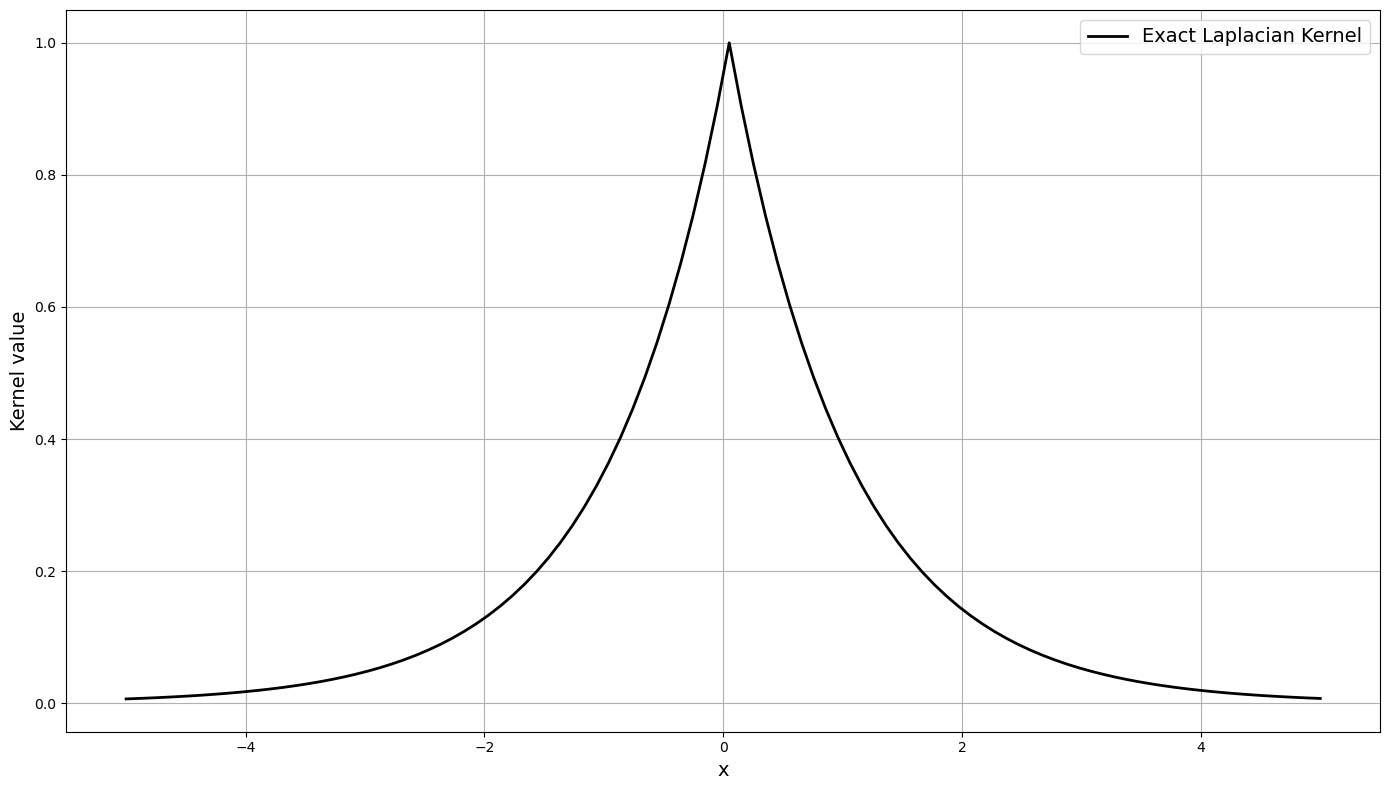

In [4]:
x = np.linspace(-5, 5, 100).reshape(-1, 1)
# Laplacian kernel with gamma = 1
laplacian_kernel_exact = laplacian_kernel(x, None, 1)
# We observe the kernel value of the 50th data point with respect to all other data points, including itself.
ref = 50

plt.figure(figsize=(14, 8))
# colors = ['red', 'green', 'blue']
# markers = ['o', 's', '^']
# for i, D in enumerate([10, 100, 1000]):
#     Z = rf.rff_1(x, D)
#     gaussian_kernel_approximate = Z @ Z.T
#     plt.plot(x, gaussian_kernel_approximate[ref, :], label=f'rff approximation (D={D})', color=colors[i], linestyle='--', marker=markers[i], markevery=5)
    
plt.plot(x, laplacian_kernel_exact[ref, :], label='Exact Laplacian Kernel', color='black', linewidth=2)

plt.xlabel('x', fontsize=14)
plt.ylabel('Kernel value', fontsize=14)
plt.legend(loc='best', fontsize=14)
plt.grid(True)
plt.tight_layout()
plt.show()

In [222]:
float_array = np.array([0.0, -0.0, 1.5, -1.5, 2.9, -2.9])

# Convert to integers
int_array = float_array.astype(int)

print("Original float array:\n", float_array)
print("Converted integer array:\n", int_array)
print(type(set(int_array)))

Original float array:
 [ 0.  -0.   1.5 -1.5  2.9 -2.9]
Converted integer array:
 [ 0  0  1 -1  2 -2]
<class 'set'>


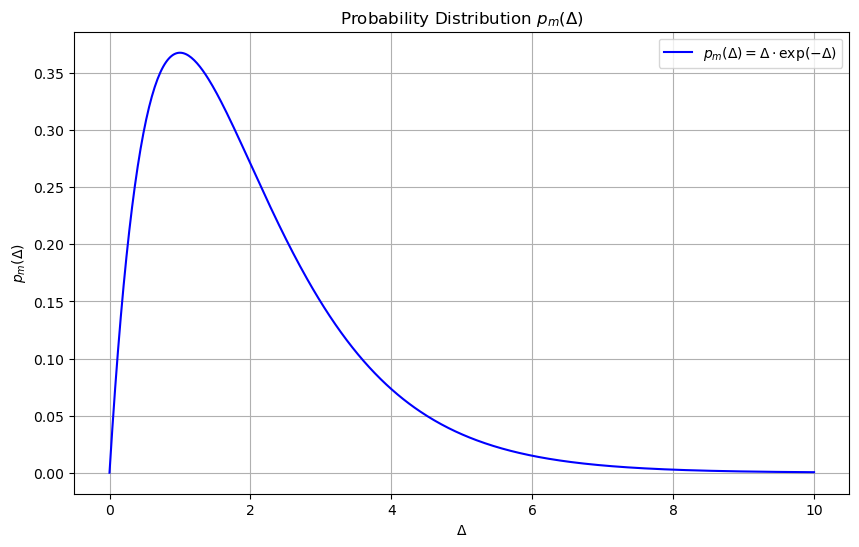

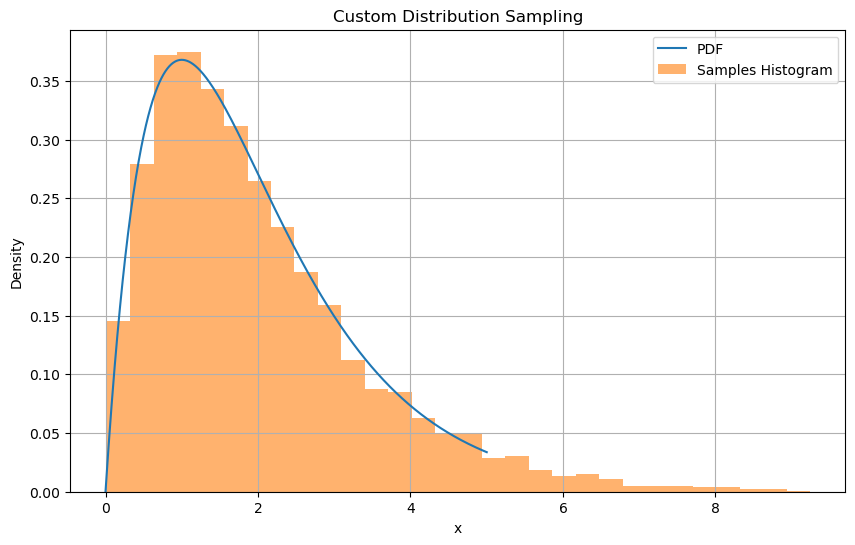

In [20]:
def p_m(delta):
    return delta * np.exp(-delta)

# Define a range for delta
delta_range = np.linspace(0, 10, 500)

# Compute the distribution p_m(delta)
p_delta = p_m(delta_range)

# Plot the distribution
plt.figure(figsize=(10, 6))
plt.plot(delta_range, p_delta, label=r'$p_m(\Delta) = \Delta \cdot \exp(-\Delta)$', color='blue')
plt.title('Probability Distribution $p_m(\Delta)$')
plt.xlabel(r'$\Delta$')
plt.ylabel(r'$p_m(\Delta)$')
plt.legend()
plt.grid(True)
plt.show()

from scipy.stats import rv_continuous

class CustomDistribution(rv_continuous):
    def _pdf(self, x):
        return x * np.exp(-x)

# Create an instance of the custom distribution
custom_dist = CustomDistribution(a=0, name='custom_dist')

# Sample from the custom distribution
n_samples = 5000
samples = custom_dist.rvs(size=n_samples)
# print("Samples from custom distribution using rv_continuous:\n", samples)

# Plot the PDF and samples
import matplotlib.pyplot as plt

x = np.linspace(0, 5, 1000)
pdf = custom_dist.pdf(x)

plt.figure(figsize=(10, 6))
plt.plot(x, pdf, label='PDF')
plt.hist(samples, bins=30, density=True, alpha=0.6, label='Samples Histogram')
plt.title('Custom Distribution Sampling')
plt.xlabel('x')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()